In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.duplicated().sum()

0

In [7]:
df['radius_worst'].unique().min()

7.93

In [8]:
df['radius_worst'].unique().max()

36.04

<Axes: ylabel='radius_worst'>

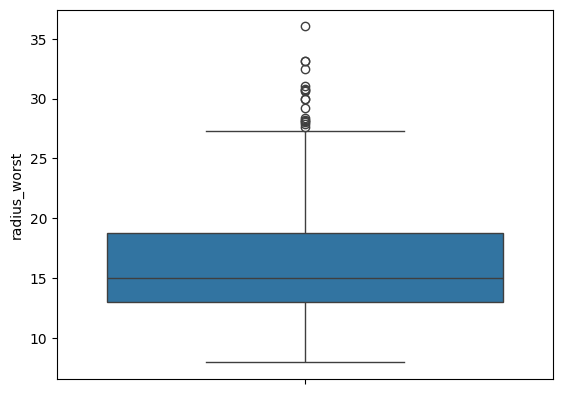

In [9]:
sns.boxplot(df['radius_worst'])

### Seperate x and y

In [10]:
x= df.drop(columns=['id','diagnosis','Unnamed: 32'])
y= df[['diagnosis']]

In [11]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
y

# malignant ("M") ---> Dangeorous
# benign ("B")---> gentle or not so Dangeorous

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [13]:
vc= df['diagnosis'].value_counts()
vc

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: ylabel='diagnosis'>

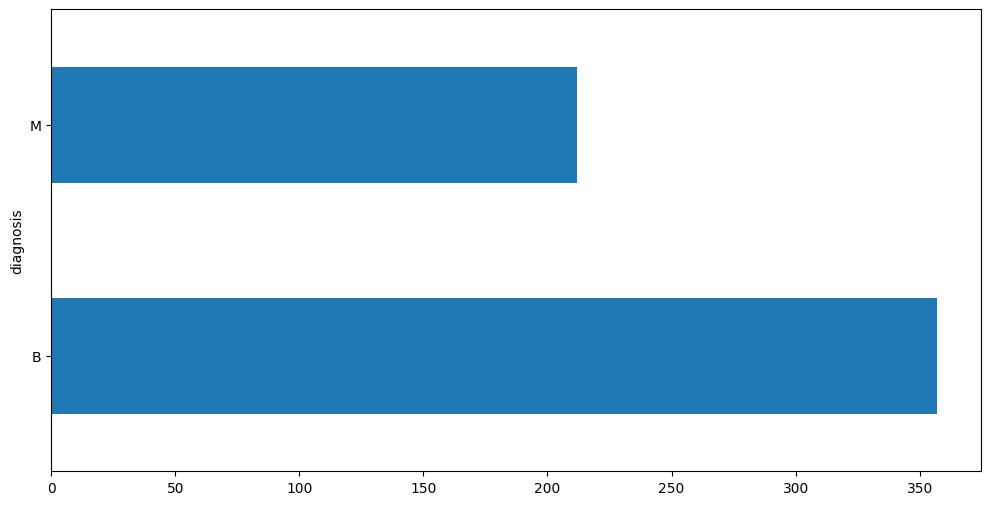

In [14]:
plt.figure(figsize=(12,6))
y['diagnosis'].value_counts().plot(kind='barh')

### Categorical and contineous variable seperation

##### Here all X features are contineous in nature so no neeed to seperate it.

### Pipeline for Feature selection

In [39]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [16]:
# Here no categorical data in adataset so we need to geerate only 1 pipeline

pre1= Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                      ('scaler',StandardScaler())])

In [17]:
xpre1= pre1.fit_transform(x)
xpre1

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [18]:
cols= pre1.get_feature_names_out()

In [19]:
cols

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [20]:
xpre1= pd.DataFrame(xpre1,columns=cols)
xpre1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [23]:
from sklearn.feature_selection import mutual_info_classif
mi= mutual_info_classif(xpre1,y)
mi

array([0.36247165, 0.09541639, 0.40453881, 0.36054631, 0.0827031 ,
       0.21198153, 0.37307428, 0.44138018, 0.06892113, 0.00680425,
       0.24685443, 0.00104242, 0.27717509, 0.34050278, 0.0165461 ,
       0.07596601, 0.11631603, 0.1276216 , 0.01788086, 0.03777357,
       0.45257863, 0.11974538, 0.47606631, 0.46492495, 0.10609117,
       0.22529171, 0.31525939, 0.43761012, 0.09250711, 0.06600644])

In [25]:
mi= pd.Series(mi)
mi

0     0.362472
1     0.095416
2     0.404539
3     0.360546
4     0.082703
5     0.211982
6     0.373074
7     0.441380
8     0.068921
9     0.006804
10    0.246854
11    0.001042
12    0.277175
13    0.340503
14    0.016546
15    0.075966
16    0.116316
17    0.127622
18    0.017881
19    0.037774
20    0.452579
21    0.119745
22    0.476066
23    0.464925
24    0.106091
25    0.225292
26    0.315259
27    0.437610
28    0.092507
29    0.066006
dtype: float64

In [27]:
mi.index= cols

In [28]:
mi.index

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [29]:
mi

radius_mean                0.362472
texture_mean               0.095416
perimeter_mean             0.404539
area_mean                  0.360546
smoothness_mean            0.082703
compactness_mean           0.211982
concavity_mean             0.373074
concave points_mean        0.441380
symmetry_mean              0.068921
fractal_dimension_mean     0.006804
radius_se                  0.246854
texture_se                 0.001042
perimeter_se               0.277175
area_se                    0.340503
smoothness_se              0.016546
compactness_se             0.075966
concavity_se               0.116316
concave points_se          0.127622
symmetry_se                0.017881
fractal_dimension_se       0.037774
radius_worst               0.452579
texture_worst              0.119745
perimeter_worst            0.476066
area_worst                 0.464925
smoothness_worst           0.106091
compactness_worst          0.225292
concavity_worst            0.315259
concave points_worst       0

In [34]:
mi=mi.sort_values(ascending=False)
mi

perimeter_worst            0.476066
area_worst                 0.464925
radius_worst               0.452579
concave points_mean        0.441380
concave points_worst       0.437610
perimeter_mean             0.404539
concavity_mean             0.373074
radius_mean                0.362472
area_mean                  0.360546
area_se                    0.340503
concavity_worst            0.315259
perimeter_se               0.277175
radius_se                  0.246854
compactness_worst          0.225292
compactness_mean           0.211982
concave points_se          0.127622
texture_worst              0.119745
concavity_se               0.116316
smoothness_worst           0.106091
texture_mean               0.095416
symmetry_worst             0.092507
smoothness_mean            0.082703
compactness_se             0.075966
symmetry_mean              0.068921
fractal_dimension_worst    0.066006
fractal_dimension_se       0.037774
symmetry_se                0.017881
smoothness_se              0

<Axes: title={'center': 'mutual_info_score'}>

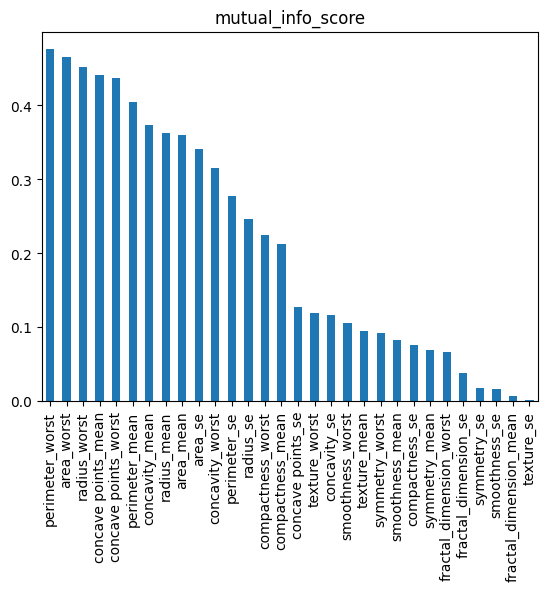

In [35]:
mi.plot(kind='bar',title= 'mutual_info_score')

In [38]:
# Since y is not much dependent onlast 4 features so we drop that features
sel_cols= list(mi[0:25].index)
sel_cols

['perimeter_worst',
 'area_worst',
 'radius_worst',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'concavity_mean',
 'radius_mean',
 'area_mean',
 'area_se',
 'concavity_worst',
 'perimeter_se',
 'radius_se',
 'compactness_worst',
 'compactness_mean',
 'concave points_se',
 'texture_worst',
 'concavity_se',
 'smoothness_worst',
 'texture_mean',
 'symmetry_worst',
 'smoothness_mean',
 'compactness_se',
 'symmetry_mean',
 'fractal_dimension_worst']

### Here no need to create seperate pipeline for preprocessing because dataset contains only numeric values.

In [42]:
x_Sel= xpre1[sel_cols]
x_Sel

,perimeter_worst,area_worst,radius_worst,concave points_mean,concave points_worst,perimeter_mean,concavity_mean,radius_mean,area_mean,area_se,...,concave points_se,texture_worst,concavity_se,smoothness_worst,texture_mean,symmetry_worst,smoothness_mean,compactness_se,symmetry_mean,fractal_dimension_worst
0,2.303601,2.001237,1.886690,2.532475,2.296076,1.269934,2.652874,1.097064,0.984375,2.487578,...,0.660820,-1.359293,0.724026,1.307686,-2.073335,2.750622,1.568466,1.316862,2.217515,1.937015
1,1.535126,1.890489,1.805927,0.548144,1.087084,1.685955,-0.023846,1.829821,1.908708,0.742402,...,0.260162,-0.369203,-0.440780,-0.375612,-0.353632,-0.243890,-0.826962,-0.692926,0.001392,0.281190
2,1.347475,1.456285,1.511870,2.037231,1.955000,1.566503,1.363478,1.579888,1.558884,1.181336,...,1.424827,-0.023974,0.213076,0.527407,0.456187,1.152255,0.942210,0.814974,0.939685,0.201391
3,-0.249939,-0.550021,-0.281464,1.451707,2.175786,-0.592687,1.915897,-0.768909,-0.764464,-0.288378,...,1.115007,0.133984,0.819518,3.394275,0.253732,6.046041,3.283553,2.744280,2.867383,4.935010
4,1.338539,1.220724,1.298575,1.428493,0.729259,1.776573,1.371011,1.750297,1.826229,1.190357,...,1.144205,-1.466770,0.828471,0.220556,-1.151816,-0.868353,0.280372,-0.048520,-0.009560,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.752563,2.015301,1.901185,2.320965,1.629151,2.060786,1.947285,2.110995,2.343856,2.604187,...,2.067178,0.117700,0.666001,0.378365,0.721473,-1.360158,1.041842,0.191805,-0.312589,-0.709091
565,1.421940,1.494959,1.536720,1.263669,0.733827,1.615931,0.693043,1.704854,1.723842,1.291565,...,0.808431,2.047399,0.252202,-0.691230,2.085134,-0.531855,0.102458,-0.069758,-0.217664,-0.973978
566,0.579001,0.427906,0.561361,0.105777,0.414069,0.672676,0.046588,0.702284,0.577953,0.180698,...,0.612157,1.374854,0.510827,-0.809587,2.045574,-1.104549,-0.840484,0.661277,-0.809117,-0.318409
567,2.303601,1.653171,1.961239,2.658866,2.289985,1.982524,3.296944,1.838341,1.735218,1.009503,...,0.785721,2.237926,1.302285,1.430427,2.336457,1.919083,1.525767,2.017716,2.137194,2.219635


### Create a pipeline for y features

### Train Test Split

In [ ]:
#from sklearn.model_selection import train_test_split
#xtrain,xtest,ytrain,ytest= train_test_split(x_Sel,,)